In [2]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_excel("airport_choice_survey_EN_ver2.0_Capstone.xlsx",sheet_name ='Data' , header = 0)

In [7]:
df.describe()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,DepartureTime,SeatClass,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,Mileage
count,488.000000,488.000000,478.000000,487.000000,485.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,484.000000,333.000000,488.000000,488.000000,291.000000,391.000000,488.000000,356.000000,90.000000
mean,244.500000,1.510246,2.422594,39.965092,1.527835,1.483607,1.518443,27.440574,2.819672,3.391393,...,2.432377,1.121901,50.456577,1.334016,3.801230,11220.079038,51.831202,6.768443,3.126404,56383.700000
std,141.017729,0.500408,1.208492,13.672869,0.499740,1.013126,0.861966,74.988134,4.001573,2.599259,...,0.749769,0.396172,28.981217,0.552306,2.380499,24083.030747,43.486834,4.172077,1.573828,89411.837228
min,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000
25%,122.750000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,2.000000,1.000000,35.000000,1.000000,2.000000,2000.000000,25.000000,2.000000,2.000000,8257.500000
50%,244.500000,2.000000,2.000000,38.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,...,2.000000,1.000000,45.000000,1.000000,3.000000,6000.000000,40.000000,8.000000,3.000000,27997.500000
75%,366.250000,2.000000,4.000000,50.000000,2.000000,1.000000,2.000000,8.000000,3.000000,5.000000,...,3.000000,1.000000,60.000000,2.000000,6.000000,12000.000000,60.000000,12.000000,4.000000,61808.000000
max,488.000000,2.000000,4.000000,80.000000,2.000000,5.000000,4.000000,730.000000,34.000000,8.000000,...,4.000000,3.000000,260.000000,4.000000,11.000000,350000.000000,390.000000,12.000000,7.000000,500000.000000


In [12]:
df.dtypes

ID                              int64
Airport                      category
Airline                      category
Age                           float64
Gender                       category
Nationality                  category
TripPurpose                  category
TripDuration                    int64
FlyingCompanion                 int64
ProvinceResidence            category
GroupTravel                  category
NoTripsLastYear                 int64
FrequentFlightDestination    category
Destination                  category
FlightNo                       object
DepartureHr                    object
DepartureMn                   float64
DepartureTime                category
SeatClass                    category
Airfare                       float64
NoTransport                     int64
ModeTransport                category
AccessCost                    float64
AccessTime                    float64
Occupation                   category
Income                       category
MileageAirli

In [6]:
df[["Airport","Airline","Gender","Nationality","TripPurpose","ProvinceResidence","GroupTravel","FrequentFlightDestination","Destination","DepartureTime","SeatClass","ModeTransport","Occupation","Income","MileageAirline"
         ]]=df[["Airport","Airline","Gender","Nationality","TripPurpose","ProvinceResidence","GroupTravel","FrequentFlightDestination","Destination","DepartureTime","SeatClass","ModeTransport","Occupation","Income","MileageAirline"
         ]].astype('category')
df.dtypes
df.describe(include= ['category'])

,Airport,Airline,Gender,Nationality,TripPurpose,ProvinceResidence,GroupTravel,FrequentFlightDestination,Destination,DepartureTime,SeatClass,ModeTransport,Occupation,Income,MileageAirline
count,488,478.0,485.0,488,488,488,488,488,483.0,488,484.0,488,488,356.0,251
unique,2,4.0,2.0,5,4,8,2,21,4.0,4,3.0,11,12,7.0,12
top,2,1.0,2.0,1,1,1,2,1,3.0,2,1.0,1,12,2.0,4
freq,249,153.0,256.0,378,324,186,403,157,170.0,213,437.0,108,126,93.0,118


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE8D36AE48>,
      dtype=object)

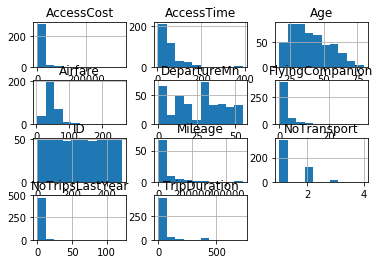

In [13]:
df.hist()


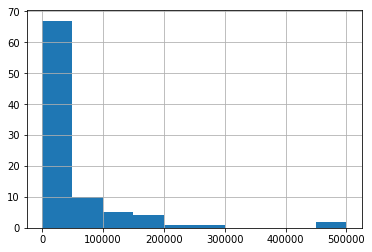

In [16]:
df['Mileage'].hist()

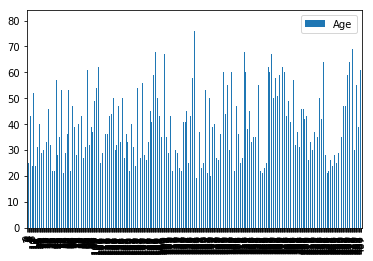

In [25]:
df1 = df.loc[:,["Airport", "Age"]]
df1.plot.bar()

In [25]:
dat = pd.read_csv("Cleaned_Data.csv")
dat.head(5)

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,FrequentDestination3,FrequentDestination4,FrequentDestination5,FrequentDestination6,FrequentDestination7,MileageAirline1,MileageAirline2,MileageAirline3,MileageAirline4,MileageAirline5
0,1,1,1,49,1,1,2,7,0,3,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,49,2,1,1,4,4,3,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,25,1,1,1,10,2,3,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,29,1,1,2,7,2,3,...,0,0,1,0,0,0,1,0,0,0
4,5,1,1,34,2,1,2,4,0,3,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#dat = pd.get_dummies(dat, columns =["Airport","Airline","Gender","Nationality","TripPurpose","ProvinceResidence","GroupTravel",\
#                                       "Destination","DepartureTime","SeatClass","ModeTransport","Occupation","Income","MileageAirline",\
#                                      "FrequentDestination1","FrequentDestination2","FrequentDestination3","FrequentDestination4","FrequentDestination5","FrequentDestination6","FrequentDestination7",\
#                                      "MileageAirline1","MileageAirline2","MileageAirline3","MileageAirline4","MileageAirline5"],drop_first = True)

dat.head(5)

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,FrequentDestination3,FrequentDestination4,FrequentDestination5,FrequentDestination6,FrequentDestination7,MileageAirline1,MileageAirline2,MileageAirline3,MileageAirline4,MileageAirline5
0,1,1,1,49,1,1,2,7,0,3,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,49,2,1,1,4,4,3,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,25,1,1,1,10,2,3,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,29,1,1,2,7,2,3,...,0,0,1,0,0,0,1,0,0,0
4,5,1,1,34,2,1,2,4,0,3,...,0,0,0,0,0,0,0,0,0,1


In [27]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared


In [28]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = dat["Airport"]
X = dat.drop(columns = 'Airport', axis = 1)
#k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k snip= 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

KeyboardInterrupt: 

In [30]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = dat["Airport"]
X = dat.drop(columns = 'Airport', axis = 1)
#k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k snip= 11 features in X
for k in range(1,len(X.columns) + 1):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

KeyboardInterrupt: 